In [ ]:
 !pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import library yang dibutuhkan
import nltk

# fungsi untuk menjalankan tokenization
def tokenize(text):
    # mengubah text menjadi list of tokens
    tokens = nltk.word_tokenize(text)

    # mengembalikan list of tokens
    return tokens

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [ ]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  data = tokenize(data)

  return data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/Book1Databenarkintamani.xlsx')

In [ ]:
df.head()

,text,label
0,baru masuk kintamani langsung bayar gitu kah?...,positif
1,yg belum tau utk ke daerah kintamani dikenaka...,positif
2,udaa pernah. Kintamani skg masuk bayar ya? Wkwk',positif
3,Minggu lalu lewat Kintamani dikenakan retribusi,positif
4,guys mau tanya semenjak diberlakukan pmbyrn m...,positif


In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
x = []
for i in range(len(df)):
  val = preprocess_data(df['text'][i])
  x.append(val)

In [ ]:
xx = x

In [ ]:
comment = []
for i in range(len(xx)):
  comment.append(' '.join(xx[i]))

In [ ]:
df['text'] = comment

In [ ]:
df.head()

,text,label
0,baru masuk kintamani langsung bayar gitu tiket...,positif
1,yg tau utk daerah kintamani kena tiket masuk b...,positif
2,udaa pernah kintamani skg masuk bayar wkwk,positif
3,minggu lalu lewat kintamani kena retribusi,positif
4,guys mau tanya semenjak laku pmbyrn masuk kint...,positif


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(comment,df['label'],
                                                   test_size=0.2, stratify=df['label'], random_state=0)

In [ ]:
# data training
X_train

['tar kintamani lewat',
 'daerah kintamani sama bedugul aja sisa sikso neroko',
 'daerah kintamani daerah gunung batur danau batur indah bangettt pandang nya',
 'camping kintamani memang juaraaaa',
 'spirit animal mu anjing kintamani',
 'kintamani sertu sang putu wiradana laksana komsos rutin thd masyarakat utk jalin',
 'menparekraf kunjung fasilitas inap inovatif bobocabin kintamani bal',
 'wkwk betollll tpi bukan badung aku kintamani',
 'kintamani bukan',
 'kintamani kack sni sekali honeymoon',
 'masuk daerah kintamani bayar gak guys',
 'bobocabin kintamani segera buka',
 'wakakak kemarin kintamani beli still water with ice and lemon harga 20k kirain air apa',
 'ken kintamani lo',
 'tweet reminder buat punya akun kalo suatu bakal layar kintamani',
 'gais kintamani bayar',
 'kintamani kaa',
 'kintamani dingin bangett brrrrrrr',
 'awk berat pungut tiket warga kintamani warga lokal yg hendak lewat kawasan panelokan pemkab bangli dengar aspirasi rakyat bangli ratu aji wedakarna kirim sur

In [ ]:
# data uji
X_test

['kan emg tinggi coba liat aja google kintamani',
 'ken kintamani jadi anjg cakep amaat',
 'manis manis aja kenyem bajang bajang kintamani ne',
 'kintamani kak',
 'yuk gas kintamani smeton',
 'ayoo kelar kamu koas libur kintamani',
 'ling kintamani ci',
 'minta disperindag pikir pasar seni geopark kintamani',
 'si bayar aku kintamani gatau bayar',
 'ngeteh tengok view',
 'kalau mau daerah atas boleh sejuk sejuk',
 'owh brrti kintamani',
 'healing dulu guys kintamani',
 'kle rekomendasi villa inap glamping kintamani cakep dong family friendly suksma',
 'sama anak2 kintamani air panas',
 'jam 12 12 ajak kintamani naik motor gila',
 'kegabutan hari sanur ubud kintamani minyak peti tenget kuta sanur',
 'masuk kintamani belah mana sih yg bayar aku minggu udah 3 kali bolak balik kintamani asa gak deh',
 'anaq kintamani bgt nich kemarinz',
 'dah kasi tau ngeyel n ntipikal wisatawan domestik haus pepotoan tp ga ngitung durasi',
 'kintamani nusa penida',
 'klo lali kintamani bayar ga pas masuk'

In [ ]:
# label training
y_train

53     positif
223    positif
147    positif
74     positif
144    positif
        ...   
243    positif
104    positif
265    positif
120    positif
185    positif
Name: label, Length: 238, dtype: object

In [ ]:
# label uji
y_test

283    positif
281    positif
239    positif
126    positif
190    positif
276    positif
238    positif
79     positif
27     positif
268    positif
77     positif
86     positif
43     positif
171    positif
200    positif
38     positif
46     positif
13     positif
263    positif
48     negatif
251    positif
19     positif
34     positif
30     positif
170    positif
250    positif
154    positif
42     positif
209    positif
63     positif
294    positif
176    positif
181    positif
127    positif
1      positif
54     negatif
139    positif
106    positif
272    positif
249    positif
270    positif
140    positif
204    positif
135    positif
71     positif
134    positif
35     positif
59     positif
284    positif
158    positif
193    positif
292    positif
172    positif
109    positif
184    positif
192    positif
95     positif
112    positif
94     positif
122    positif
Name: label, dtype: object

In [ ]:
# import library yang dibutuhkan
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer


# membuat object tf-idf
tfidf = TfidfVectorizer()
# mengkonversi data teks menjadi vektor menggunakan tf-idf
X_train = tfidf.fit_transform(X_train)
# membuat object naive bayes
nb = MultinomialNB()
# melakukan training data latih
nb.fit(X_train, y_train)
# mengkonversi data teks menjadi vektor menggunakan tf-idf
X_test = tfidf.transform(X_test)
# memprediksi label data uji
y_pred = nb.predict(X_test)
# menampilkan hasil klasifikasi
print(y_pred)


['positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif']


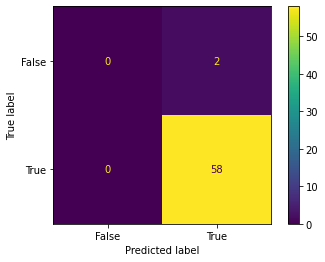

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
     positif       0.97      1.00      0.98        58

    accuracy                           0.97        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.93      0.97      0.95        60



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle

filename = 'kintamani.pkl'
pickle.dump(nb, open(filename, 'wb'))

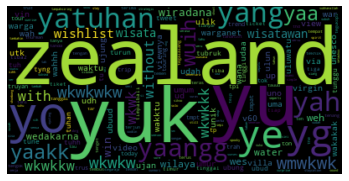

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
wordcloud = WordCloud().generate_from_frequencies(vectorizer.vocabulary_)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

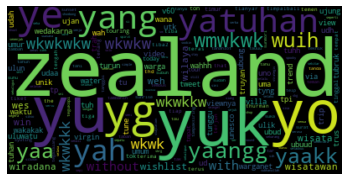

In [ ]:
from wordcloud import WordCloud
# ini untuk tfidf
wordcloud = WordCloud().generate_from_frequencies(tfidf.vocabulary_)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()